# Starter Classes

These are classes that will be used throughout the project. 

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores

import matplotlib.pyplot as plt

# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [2]:
#import Data from Experiment
raw_data = import_data('Out_Of_Set_Tan_Final.csv', "C:/Users/sdgeo/Dropbox/Own/Graduate-School/First_Semester/COMP_790/workspace/out_of_sample") 

#Do Any reformatting on raw_data
cleaned_data_f = raw_data


In [3]:
#Make column for comparing in-vs-out data
likelihood_data = cleaned_data_f[['Correct_Category','In-Likelihood','Out-Likelihood']]
likelihood_ = likelihood_data.loc[likelihood_data['Correct_Category'] == 'airplane']
likelihood_data.describe()
likelihood_data

,Correct_Category,In-Likelihood,Out-Likelihood
0,otter,-25.496887,NaN
1,wolf,16.791168,NaN
2,tulips,-23.882523,NaN
3,bee,NaN,-29.560852
4,wolf,0.617004,NaN
5,sunflowers,-44.803879,NaN
6,palm,-36.769287,NaN
7,butterfly,NaN,-21.032516
8,skyscraper,-1.544937,NaN
9,tractor,-40.556427,NaN


In [4]:
category_likes = cleaned_data_f[['Correct_Category','Likelihood']]
category_likes.describe()

,Likelihood
count,10000.000000
mean,-23.533660
std,20.143145
min,-159.637787
25%,-35.462887
50%,-23.805702
75%,-12.529053
max,105.870560


In [5]:
#Import Labels for all the classes
labels_file_all = "D:/Machine_Learning/Datasets/cifar_100/labels.txt"
class_file_all = open(labels_file_all,'r')
labels_all = class_file_all.read().split('\n')
labels_all

['apples',
 'aquarium fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottles',
 'bowls',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'cans',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'computer keyboard',
 'couch',
 'crab',
 'crocodile',
 'cups',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'lamp',
 'lawn-mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple',
 'motorcycle',
 'mountain',
 'mouse',
 'mushrooms',
 'oak',
 'oranges',
 'orchids',
 'otter',
 'palm',
 'pears',
 'pickup truck',
 'pine',
 'plain',
 'plates',
 'poppies',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'roses',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflowers',
 'sweet peppers',
 'table',
 'tank',
 'telephone',
 'television',
 

In [7]:
#Build a frame of class by class average
column_list = ['Class', 'Average']
average_data_frame = pd.DataFrame(columns=column_list)

for i in labels_all:
    current_frame = category_likes.loc[category_likes['Correct_Category'] == i]
    mean = current_frame.mean()[0]
    
    to_add = pd.DataFrame([[i,mean]], columns = column_list)
    average_data_frame = average_data_frame.append(to_add)
    
average_data_frame

,Class,Average
0,apples,-28.357697
0,aquarium fish,-26.588098
0,baby,-34.767613
0,bear,-23.701285
0,beaver,-23.401978
0,bed,-22.473812
0,bee,-30.940806
0,beetle,-21.952292
0,bicycle,-23.367757
0,bottles,-22.956838


# Plots and Graphs

Using the frames above we can create the plots we need for viewing the data

In [8]:
#Show the histograms for all the 
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data_f.reindex(sorted(cleaned_data_f.columns), axis=1)
cleaned_data_f.hist(bins=50, figsize=(150,130))
plt.show()

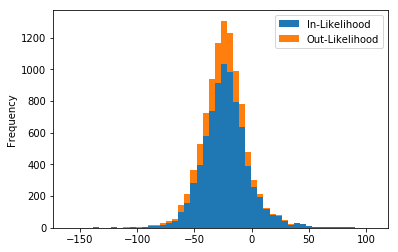

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
likelihood_data.reindex(sorted(likelihood_data.columns), axis=1)
likelihood_data.plot.hist(bins=50, stacked=True, legend=True)
plt.savefig('hist_likelihoods.jpeg')
plt.show()

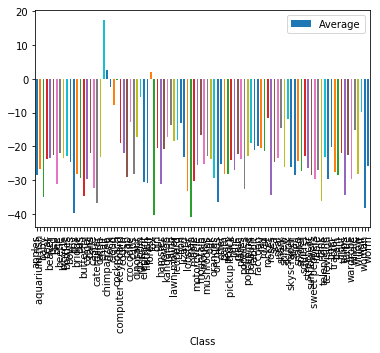

In [10]:
#Bar Graph of classes
%matplotlib inline
import matplotlib.pyplot as plt
average_data_frame.reindex(sorted(average_data_frame.columns), axis=1)
average_data_frame.plot.bar(x='Class',y='Average')
plt.savefig('bar_cat.jpeg')
plt.show()

In [3]:
mean_data = cleaned_data_f[['In-vs-Out','Mean_Part']]
median_data = cleaned_data_f[['In-vs-Out','Min_Part']]
quarter_data = cleaned_data_f[['In-vs-Out','Quarter_Part']]
mean_data.count()[0]

10020

NameError: name 'labels_all' is not defined

In [110]:
#Get Data
horse_frame = current_frame = cleaned_likes.loc[cleaned_likes['Correct_Category'] == 'horse']
horse_frame.quantile(0.25)

Likelihood   -50.892262
Name: 0.25, dtype: float64



Cleaned data item:
cleaned_data

In [4]:
cleaned_data_f

,Item_Number,file,Correct_Category,Estimated_Category,Max_Softmax_Value,Likelihood,In-vs-Out,In-Likelihood,Out-Likelihood,Mean_Part,Min_Part,Quarter_Part
0,0,000000228122.jpg,car,airplane,1.000000,42.196045,Out,NaN,42.196045,In,In,In
1,1,000000449307.jpg,dog,horse,0.999012,-4.945770,Out,NaN,-4.945770,In,In,In
2,2,000000518318.jpg,car,airplane,1.000000,-102.750198,Out,NaN,-102.750198,Out,Out,Out
3,3,000000219269.jpg,laptop,airplane,0.966397,-69.894241,Out,NaN,-69.894241,Out,Out,Out
4,4,000000335106.jpg,zebra,horse,0.999030,88.839523,Out,NaN,88.839523,In,In,In
5,5,000000507266.jpg,cat,horse,1.000000,-107.268982,Out,NaN,-107.268982,Out,Out,Out
6,6,000000196506.jpg,cake,horse,0.999999,-143.403107,Out,NaN,-143.403107,Out,Out,Out
7,7,000000103877.jpg,cat,horse,0.940300,-76.007263,Out,NaN,-76.007263,Out,Out,Out
8,8,000000229035.jpg,laptop,airplane,0.997481,-21.218063,Out,NaN,-21.218063,Out,Out,In
9,9,000000302928.jpg,laptop,airplane,0.993888,-38.181366,Out,NaN,-38.181366,Out,Out,In


In [24]:
cleaned_data.describe()

,Item_Number,Max_Softmax_Value,Likelihood
count,9990.000000,9990.000000,9990.000000
mean,4994.500000,0.947428,-45.300444
std,2884.008929,0.110974,52.712472
min,0.000000,0.500269,-182.867783
25%,2497.250000,0.968039,-81.729908
50%,4994.500000,0.999443,-57.879257
75%,7491.750000,0.999997,-24.466026
max,9989.000000,1.000000,126.727081


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(150,130))
plt.savefig('hist_categories.jpeg')
plt.show()

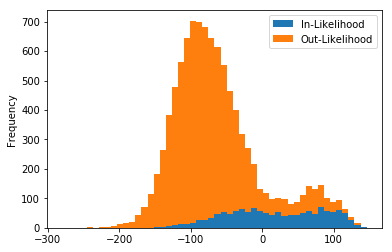

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.plot.hist(bins=50, stacked=True, legend=True)
plt.savefig('hist_likelihoods.jpeg')
plt.show()

In [39]:
labels_file_all = "D:/Machine_Learning/Datasets/ten_class_classifier/labels.txt"


class_file_all = open(labels_file_all,'r')
class_list_all = class_file_all.read().split('\n')
labels_all = class_list_all
labels_all

['airplane',
 'horse',
 'book',
 'cake',
 'car',
 'cat',
 'dog',
 'laptop',
 'pizza',
 'zebra']

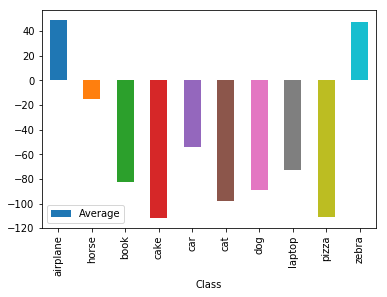

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
average_data_frame.reindex(sorted(average_data_frame.columns), axis=1)
average_data_frame.plot.bar(x='Class',y='Average')
plt.savefig('bar_cat.jpeg')
plt.show()

In [100]:
average_data_frame

,Class,Average
0,airplane,48.842840
0,horse,-15.139581
0,book,-82.235914
0,cake,-111.785151
0,car,-54.391081
0,cat,-97.878257
0,dog,-89.199862
0,laptop,-72.945765
0,pizza,-110.731967
0,zebra,47.142435


In [7]:
corr_matrix = cleaned_data.corr()

In [6]:
corr_matrix_spear = cleaned_data_f.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data_f).pvalue)
corr_matrix_spear

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Item_Number,Max_Softmax_Value,Likelihood,In-Likelihood,Out-Likelihood
Item_Number,1.000000,-0.008482,0.005877,-0.001086,0.004166
Max_Softmax_Value,-0.008482,1.000000,0.260206,0.069476,0.102899
Likelihood,0.005877,0.260206,1.000000,1.000000,1.000000
In-Likelihood,-0.001086,0.069476,1.000000,1.000000,NaN
Out-Likelihood,0.004166,0.102899,1.000000,NaN,1.000000


In [ ]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("correlation_map.png", dpi = 'figure')

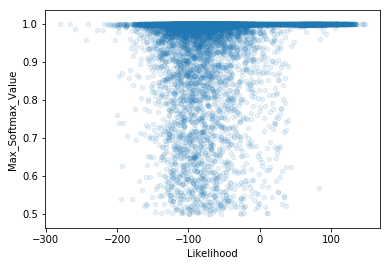

In [7]:
%matplotlib inline
cleaned_data_f.plot(kind="scatter", x="Likelihood", y="Max_Softmax_Value", alpha=0.1)
plt.savefig('Correlation_Correct_Softmax.jpeg')
plt.show()

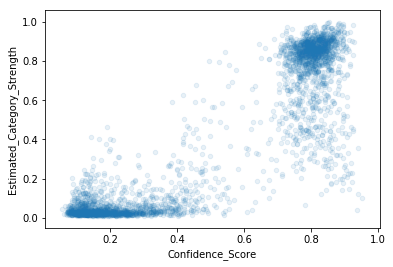

In [55]:
%matplotlib inline
cleaned_data.plot(kind="scatter", x="Confidence_Score", y="Estimated_Category_Strength", alpha=0.1)
plt.savefig('Correlation_Strongest_Category.jpeg')
plt.show()

In [34]:
confidence_compare

,Max_Confidence_Index_Value,Correct_Confidence
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [134]:
#In-V-Out Accuracy

confidence_matrix = mean_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.8560878243512974

In [133]:
#In-V-Out Accuracy

confidence_matrix = median_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.8523952095808384

In [131]:
#In-V-Out Accuracy

confidence_matrix = quarter_data.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, mean_data.count()[0],0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,mean_data.count()[0],0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.7473053892215569

In [123]:
#Calculate in/out Accuracy

confidence_matrix = confidence_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 3000,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,3000,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

NameError: name 'confidence_compare' is not defined

In [11]:
#Calculate in/out Accuracy

confidence_matrix = blur_compare.as_matrix()
left = confidence_matrix[:, [0]]
left = np.reshape(left, 1500,0)

right = confidence_matrix[:, [1]]
right = np.reshape(right,1500,0)

in_common = 0
for i in range(len(confidence_matrix)):
    if right[i] == left[i]:
        in_common = in_common + 1

accuracy = in_common/len(confidence_matrix)
accuracy

0.021333333333333333